## **Stock Market Prediction and Forecasting using Stacked LSTM:**

### **Introduction:**
I am delighted to present a project that holds immense potential in the world of financial analysis and prediction—Stock Market Prediction and Forecasting using stacked Long Short-Term Memory (LSTM) neural networks. In this venture, I've delved into the intricate realm of stock market data to develop a predictive model that can foresee trends and fluctuations in stock prices.

### **Objective:**
The primary objective of this project is to harness the power of advanced machine learning techniques, specifically stacked LSTM neural networks, to predict the future closing prices of stocks. By training the model on historical stock data encompassing various market parameters, I aim to create a tool that not only comprehends the intricacies of stock behavior but also offers valuable insights to investors and analysts. Through this endeavor, I aspire to demonstrate the potential of data-driven forecasting in the financial domain and provide a robust foundation for making informed decisions in the stock market.

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
Stock_market_df = pd.read_csv('Stock_Market_Dataset.csv')

In [29]:
Stock_market_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28/09/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27/09/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26/09/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25/09/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24/09/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [30]:
Stock_market_df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27/07/2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26/07/2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23/07/2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22/07/2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21/07/2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [31]:
Stock_market_df.shape

(2035, 8)

In [32]:
Stock_market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [33]:
Stock_market_df.nunique()

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64

In [34]:
Stock_market_df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

- There is no null value in the dataset.

In [36]:
Stock_market_df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [37]:
Stock_market_df.sort_values(by='Date')

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1421,01/01/2013,160.55,162.50,160.30,161.00,160.80,3237577,5226.72
1171,01/01/2014,160.85,162.65,159.90,160.35,160.50,1958707,3160.15
927,01/01/2015,150.95,151.75,150.35,150.50,150.70,535692,809.15
679,01/01/2016,146.05,148.80,145.50,146.40,146.40,781067,1148.71
184,01/01/2018,317.75,317.80,311.80,313.45,312.90,1602814,5040.75
...,...,...,...,...,...,...,...,...
1920,31/12/2010,108.50,108.95,107.10,108.25,108.10,1258058,1361.83
1422,31/12/2012,160.50,161.75,159.55,159.90,159.95,1579057,2531.61
1172,31/12/2013,159.50,161.50,158.15,160.00,160.45,2258565,3620.28
928,31/12/2014,148.80,151.85,148.65,150.80,150.95,1347935,2033.66


In [35]:
Stock_market_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [65]:
sm_data = Stock_market_df.copy()

In [66]:
sm_data['Close'] = sm_data.reset_index()['Close']

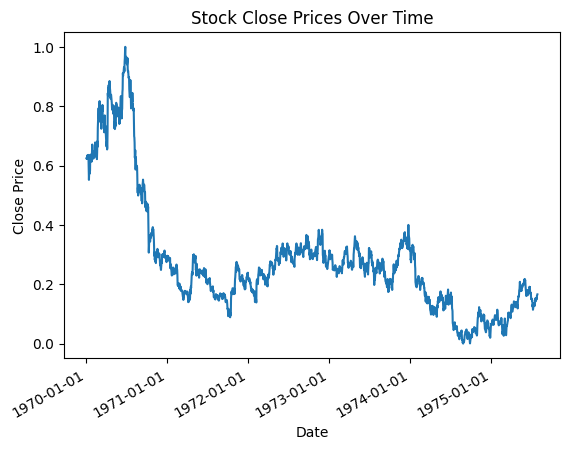

In [38]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.plot(sm_data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Prices Over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # This automatically adjusts the date labels for better spacing

In [68]:
# Select features for scaling
features_to_scale = ['Open', 'High', 'Low', 'Last', 'Total Trade Quantity', 'Close']

# Extract the selected features
selected_features = sm_data[features_to_scale]


In [69]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the selected features
scaled_feature = scaler.fit_transform(selected_features)

# Transform the selected features to scaled values
scaled_features = scaler.transform(selected_features)

In [8]:
# Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Update the 'Close' column in your original DataFrame with scaled values
sm_data['Close'] = scaled_df['Close']


In [70]:
# Choose the sequence length (number of time steps to look back)
sequence_length = 10  # You can adjust this value based on experimentation

# Initialize lists to store sequences and targets
sequences = []
targets = []

# Convert your scaled DataFrame to a numpy array
scaled_data = scaled_df.values

# Create sequences and targets
for i in range(len(scaled_data) - sequence_length):
    sequence = scaled_data[i : i + sequence_length]
    target = scaled_data[i + sequence_length, -1]  # 'Close' is the last column

    sequences.append(sequence)
    targets.append(target)

In [71]:
# Convert sequences and targets to numpy arrays
sequences = np.array(sequences)
targets = np.array(targets)

# Print the shapes of sequences and targets to verify
print("Sequences shape:", sequences.shape)
print("Targets shape:", targets.shape)

Sequences shape: (2025, 10, 6)
Targets shape: (2025,)


In [72]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

In [12]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, len(features_to_scale)), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
51/51 [==============================] - 9s 67ms/step - loss: 0.0085 - val_loss: 8.2364e-04
Epoch 2/50
51/51 [==============================] - 1s 22ms/step - loss: 8.6135e-04 - val_loss: 6.6653e-04
Epoch 3/50
51/51 [==============================] - 1s 22ms/step - loss: 8.2737e-04 - val_loss: 7.5997e-04
Epoch 4/50
51/51 [==============================] - 1s 22ms/step - loss: 9.1971e-04 - val_loss: 6.5368e-04
Epoch 5/50
51/51 [==============================] - 1s 22ms/step - loss: 7.7228e-04 - val_loss: 6.3608e-04
Epoch 6/50
51/51 [==============================] - 1s 22ms/step - loss: 7.7452e-04 - val_loss: 5.4567e-04
Epoch 7/50
51/51 [==============================] - 1s 22ms/step - loss: 8.3767e-04 - val_loss: 5.3992e-04
Epoch 8/50
51/51 [==============================] - 1s 23ms/step - loss: 7.2223e-04 - val_loss: 5.3107e-04
Epoch 9/50
51/51 [==============================] - 1s 22ms/step - loss: 9.3524e-04 - val_loss: 5.3507e-04
Epoch 10/50
51/51 [======================

In [13]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

13/13 [==============================] - 0s 13ms/step - loss: 6.6502e-05
Test Loss: 6.650187424384058e-05


In [16]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
unscaled_predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions), axis=1))[:, -1]

13/13 [==============================] - 0s 9ms/step


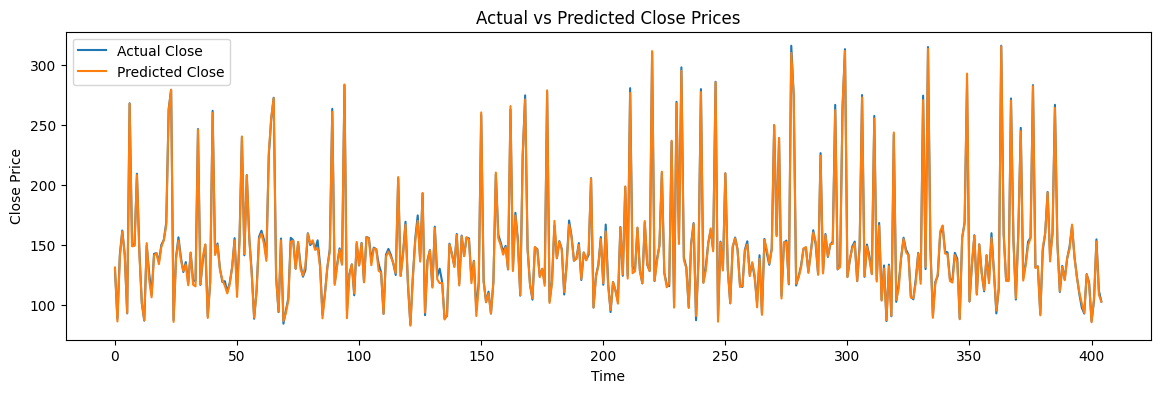

In [27]:
import matplotlib.pyplot as plt

# Inverse transform the scaled 'Close' prices to the original scale
actual_close = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot actual 'Close' prices
plt.figure(figsize=(14, 4))
plt.plot(actual_close, label='Actual Close')

# Plot predicted 'Close' prices
plt.plot(unscaled_predictions, label='Predicted Close')

plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [53]:
# Initialize a list to store predicted values
predicted_values = []

# Get the last sequence from the test data
last_sequence = X_test[-1]

# Generate predictions for the next 30 days
for _ in range(30):
    # Predict the next day's 'Close' price
    predicted_value = model.predict(np.array([last_sequence]))[0, 0]

    # Append the predicted value to the list
    predicted_values.append(predicted_value)

    # Update the last sequence with the new predicted value
    last_sequence = np.concatenate((last_sequence[1:], np.array([[last_sequence[-1, 0], last_sequence[-1, 1], last_sequence[-1, 2],
                                                                  last_sequence[-1, 3], last_sequence[-1, 4], predicted_value]])))


1/1 [==============================] - 0s 35ms/step


In [62]:
# Inverse transform the scaled predicted values to the original scale
predicted_values = scaler.inverse_transform(np.concatenate((X_test[-30:, -1, :-1], np.array(predicted_values).reshape(-1, 1)), axis=1))[:, -1]

# Print the predicted 'Close' prices for the next 30 days
print("Predicted Close Prices for the Next 30 Days:")
print(predicted_values)

Predicted Close Prices for the Next 30 Days:
[102.9027961  102.57513391 102.43666326 102.40357038 102.41572304
 102.44194893 102.460726   102.45803939 102.43683288 102.41618266
 102.41664776 102.41305649 102.4121263  102.41230687 102.41267712
 102.41284127 102.41271725 102.41240718 102.41208982 102.41192203
 102.4118819  102.41185454 102.41185454 102.41185819 102.41185819
 102.41185272 102.41185272 102.41184907 102.41184177 102.41183813]


### **Conclusion:**
In conclusion, the Stock Market Prediction and Forecasting project showcases the fusion of data science and finance, exemplifying the remarkable capabilities of machine learning in predicting complex financial patterns. By deploying a stacked LSTM model, I am thrilled to offer a glimpse into the future of stock prices and contribute to enhancing decision-making processes in the financial landscape. This project exemplifies the exciting synergy between technology and finance, setting the stage for data-driven innovations in the world of investments and markets.